In [1]:
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Examining salaries for those who: 
## (1) live in the USA, (2) share their salary details, and (3) are employed

In [2]:
df = pd.read_csv("/Users/victor/Downloads/kaggle-survey-2018/multipleChoiceResponses.csv",skiprows=1)

# 1
df = df.loc[df["In which country do you currently reside?"]=="United States of America"]

# Cleaning up the labels
df = df.iloc[:,[1,3,5,6,7,9,11,12]]
df.columns = ["Gender","Age","Education","Major","Occupation","Industry","Experience","Salary"]
df = df[["Gender","Education","Major","Industry","Occupation","Age","Experience","Salary"]]

# 2 and 3
df = df.dropna(subset=['Salary'])
df = df[~df.isin(['I am a student', 'I do not wish to disclose my approximate yearly compensation','Student','Not employed']).any(axis=1)]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2820 entries, 11 to 23775
Data columns (total 8 columns):
Gender        2820 non-null object
Education     2820 non-null object
Major         2816 non-null object
Industry      2820 non-null object
Occupation    2820 non-null object
Age           2820 non-null object
Experience    2819 non-null object
Salary        2820 non-null object
dtypes: object(8)
memory usage: 198.3+ KB


# There are potentially 5 individuals whose Major and/or Experience are missing.
## They were dropped; Is this acceptable?

In [3]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2815 entries, 11 to 23775
Data columns (total 8 columns):
Gender        2815 non-null object
Education     2815 non-null object
Major         2815 non-null object
Industry      2815 non-null object
Occupation    2815 non-null object
Age           2815 non-null object
Experience    2815 non-null object
Salary        2815 non-null object
dtypes: object(8)
memory usage: 197.9+ KB


# Adding Salary, Age, and Experience continuous features for a linear regression model

In [4]:
#Salary
dictionary = {'0-10,000'    : 5000,
              '10-20,000'   : 15000,
              '20-30,000'   : 25000,
              '30-40,000'   : 35000,
              '40-50,000'   : 45000,
              '50-60,000'   : 55000,
              '60-70,000'   : 65000,
              '70-80,000'   : 75000,
              '80-90,000'   : 85000,
              '90-100,000'  : 95000,
              '100-125,000' : 112500,
              '125-150,000' : 137500,
              '150-200,000' : 175000,
              '200-250,000' : 225000,
              '250-300,000' : 275000,
              '300-400,000' : 350000,
              '400-500,000' : 450000,
              '500,000+'    : 500000
             }
df['Salary_Mid'] = df['Salary'].apply(lambda x: dictionary[x])

#Age
dictionary = {'18-21' : 19.5,
              '22-24' : 23,
              '25-29' : 27,
              '30-34' : 32,
              '35-39' : 37,
              '40-44' : 42,
              '45-49' : 47,
              '50-54' : 52,
              '55-59' : 57,
              '60-69' : 64.5,
              '70-79' : 74.5,
              '80+'   : 80
             }
df['Age_Mid'] = df['Age'].apply(lambda x: dictionary[x])

#Experience
dictionary = {'0-1'    : .5,
              '1-2'    : 1.5,
              '2-3'    : 2.5,
              '3-4'    : 3.5,
              '4-5'    : 4.5,
              '5-10'   : 7.5,
              '10-15'  : 12.5,
              '15-20'  : 17.5,
              '20-25'  : 22.5,
              '25-30'  : 27.5,
              '30 +'   : 30
            }
df['Experience_Mid'] = df['Experience'].apply(lambda x: dictionary[x])

# Shortening of some labels

In [5]:
dictionary = {'Male'                    : 'Male',
              'Female'                  : 'Female',
              'Prefer not to say'       : 'Unknown', 
              'Prefer to self-describe' : 'Self-Describe'
             }
df.Gender = df.Gender.apply(lambda x: dictionary[x])

dictionary = {'Master’s degree'                                                  : "Master's", 
              'Bachelor’s degree'                                                : "Bachelor's",
              'Some college/university study without earning a bachelor’s degree': 'No Degree',
              'Doctoral degree'                                                  : 'Doctoral', 
              'Professional degree'                                              : 'Professional', 
              'I prefer not to answer'                                           : 'Unknown'
             }
df.Education = df.Education.apply(lambda x: dictionary[x])

dictionary = {'Social sciences (anthropology, psychology, sociology, etc.)'   : 'Social Sci',
              'Mathematics or statistics'                                     : 'Math/Stats', 
              'Engineering (non-computer focused)'                            : 'Engineering',
              'Computer science (software engineering, etc.)'                 : 'Comp Sci',
              'Physics or astronomy'                                          : 'Phys/Astron',
              'A business discipline (accounting, economics, finance, etc.)'  : 'Business',
              'Medical or life sciences (biology, chemistry, medicine, etc.)' : 'Medic Sci',
              'Fine arts or performing arts'                                  : 'Art',
              'Information technology, networking, or system administration'  : 'IT',
              'Environmental science or geology'                              : 'Envir Sci', 
              'Other'                                                         : 'Other',
              'Humanities (history, literature, philosophy, etc.)'            : 'Humanities',
              'I never declared a major'                                      : "No Major"
             }
df['Major'] = df['Major'].apply(lambda x: dictionary[x])

dictionary = {'Other'                                  : "Other",
              'Marketing/CRM'                          : "Marketing", 
              'Insurance/Risk Assessment'              : "Risk_Asse",
              'Computers/Technology'                   : "Technology", 
              'Broadcasting/Communications'            : "Communic",
              'Academics/Education'                    : "Education", 
              'Accounting/Finance'                     : "Finance",
              'Medical/Pharmaceutical'                 : "Medical", 
              'Non-profit/Service'                     : "Non-Profit",
              'Online Service/Internet-based Services' : "Online_Serv",
              'Shipping/Transportation'                : "Transport", 
              'Energy/Mining'                          : "Energy", 
              'Retail/Sales'                           : "Sales" ,
              'Military/Security/Defense'              : "Military",
              'Online Business/Internet-based Sales'   : "Online_Sales",
              'Manufacturing/Fabrication'              : "Manufactur", 
              'Government/Public Service'              : "Government",
              'Hospitality/Entertainment/Sports'       : "Entertain"
             }
df['Industry'] = df['Industry'].apply(lambda x: dictionary[x])

# Count Plots

## Because there are so few non-(fe)male, should they be removed for purely graph-related aesthetics?

## Same for non-bachelors, masters, doctoral

## Are there standards for removing certain subgroups from graphs? (for example less than 5% of group, etc.)

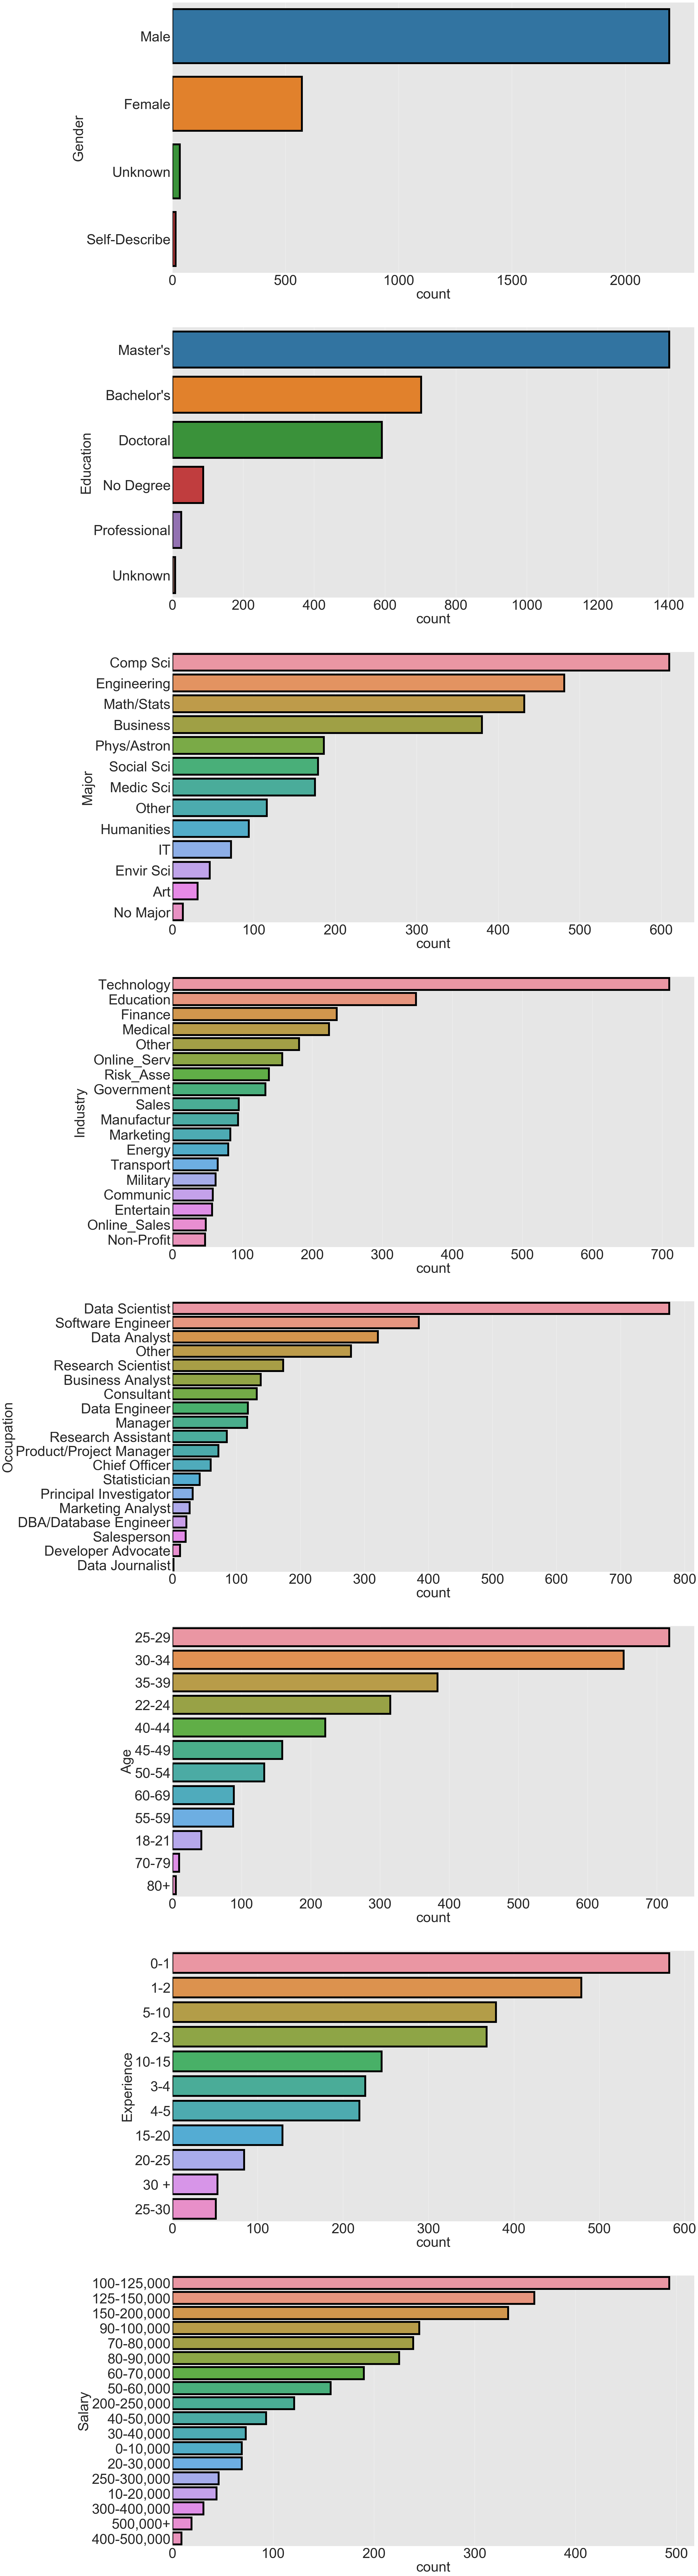

In [6]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
mpl.rcParams['font.size'] = 60.0
num_of_plots = 8
fig, ax = plt.subplots(num_of_plots,1, figsize=(5*num_of_plots, 25*num_of_plots))

z = 0
for x in df.columns[:8]:
    sns.countplot(y = df[x], edgecolor = "black", linewidth = 8, ax = ax[z], order=df[x].value_counts().index)
    z += 1 
    
fig.show()

# Box Plots (all columns vs Salary_Mid)

# Findings: 
## (1) Men make more than women (do they make statistically more?)
## (2) Master's and Doctoral have a simliar salary median (generally speaking, is a PhD a good investment?)

# Question:
## (1) If you only have a Bachelor's, is getting a Master's better in the long run? Or does the degree lose value as experience accumulates?
## (2) Why does the industry Online Services have such a larger median than the others? Is it significantly larger?

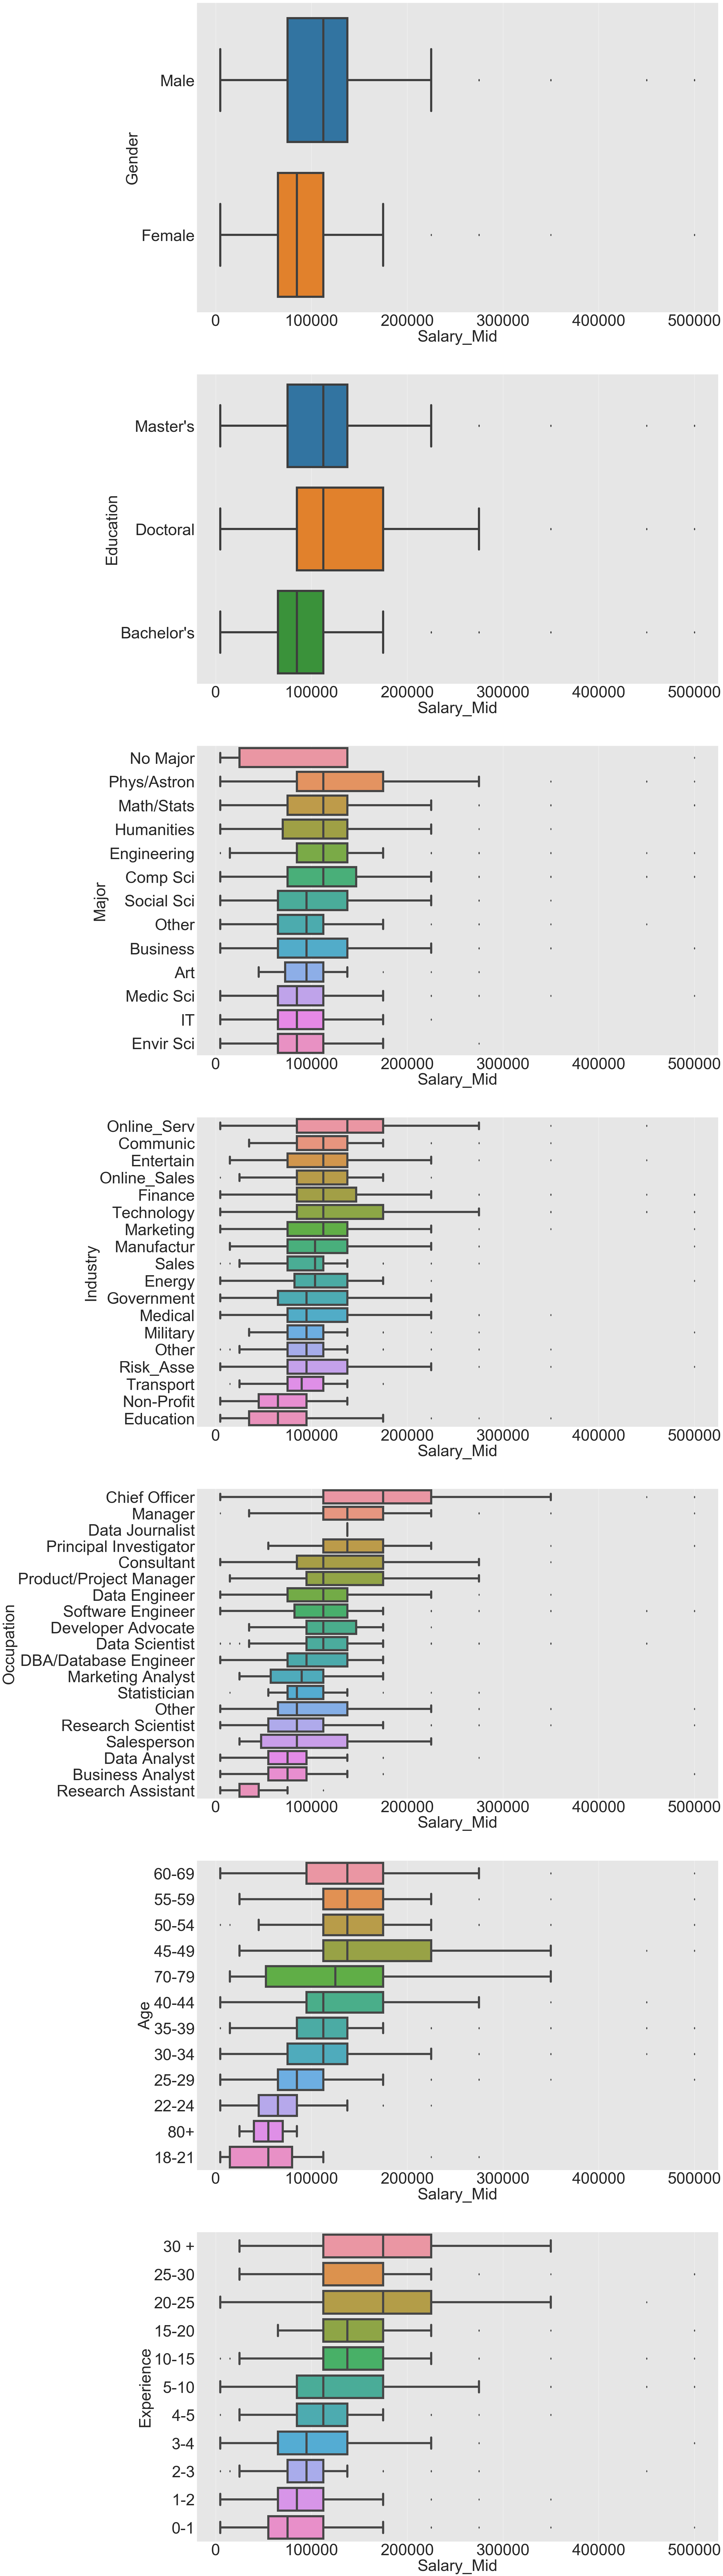

In [8]:
%matplotlib inline
mpl.rcParams['font.size'] = 60.0
num_of_plots = 7
fig, ax = plt.subplots(num_of_plots, 1, figsize=(5*num_of_plots, 25*num_of_plots))

df = df[(df.Gender=="Male") | (df.Gender=="Female")]
df = df[(df.Education=="Doctoral") | (df.Education=="Master's") | (df.Education=="Bachelor's")]


def sorted_by_median(df, by, column):
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)}).median().sort_values(ascending=False)
    return df2.index

counter_1 = 0
for x in df.columns[:7]:
    sns.boxplot(y=df[x], x=df.Salary_Mid, ax = ax[counter_1], linewidth = 8, order = (
        sorted_by_median(df, by=[x], column="Salary_Mid")))
    #plt.xlim(0,400000) #WHY DOES THIS ONLY MODIFY THE LAST PLOT? (plt.title has the same problem)
    counter_1 += 1
    fig.show()

# Box Plots (all columns vs Salary_Mid, hue = Gender)

# Question:
## For women, is a Master's degree a sound investment? (i.e., does a woman with a Master's earn significantly more than a woman with a Bachelor's?)

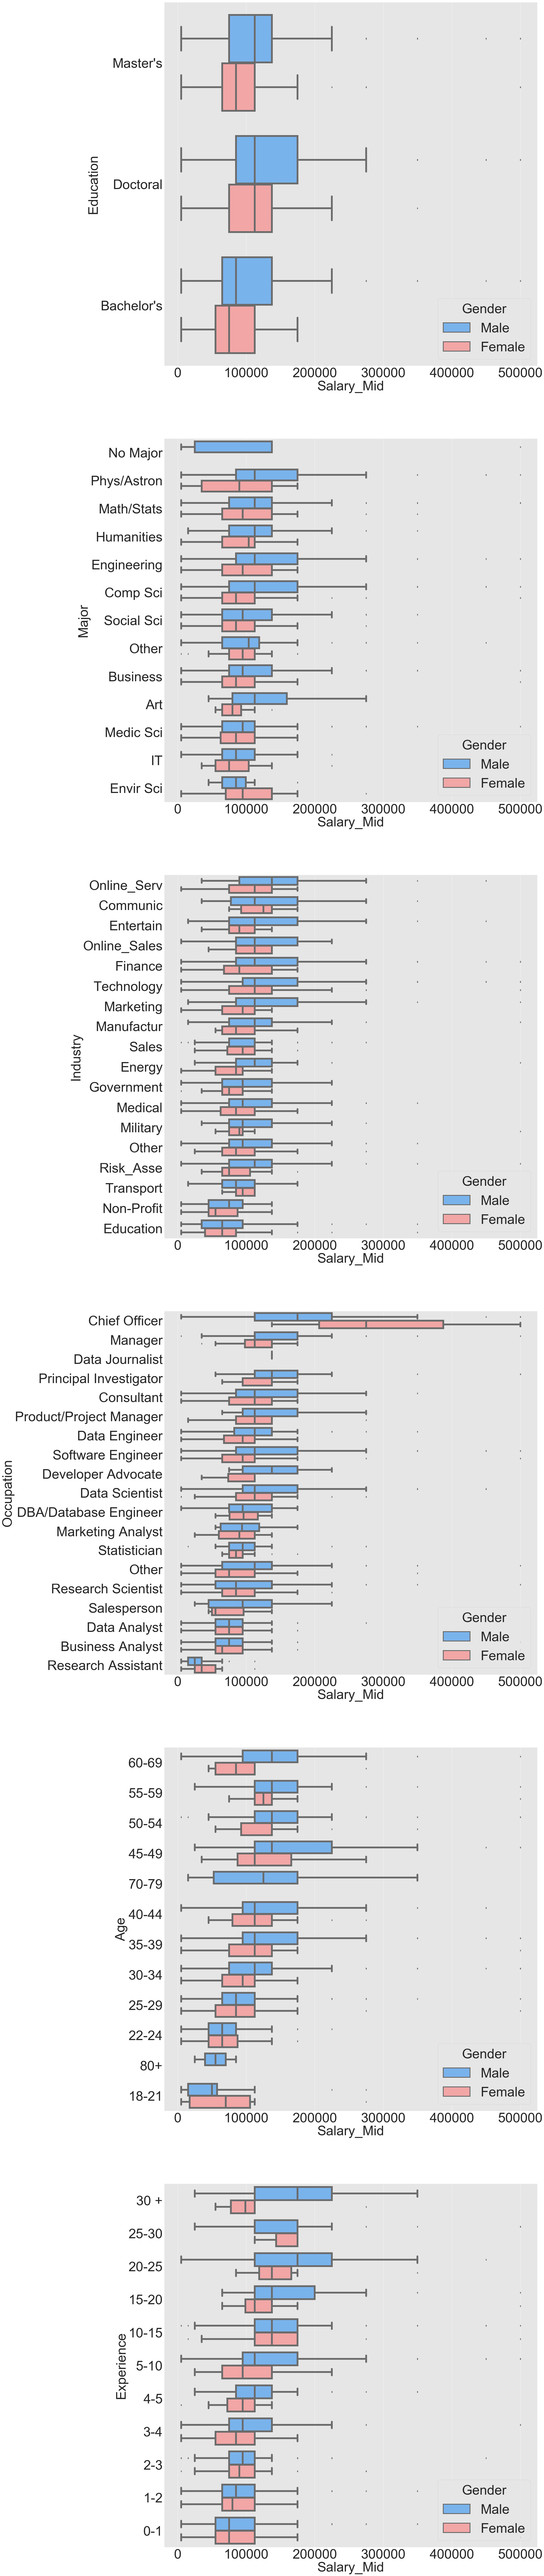

In [9]:
%matplotlib inline
mpl.rcParams['font.size'] = 60.0
num_of_plots = 6
fig, ax = plt.subplots(num_of_plots,1, figsize=(5*num_of_plots, 35*num_of_plots))

hue_df = (df[(df.Gender=="Male") | (df.Gender=="Female")])
hue = hue_df.Gender
palette = ['#66b3ff','#ff9999']

counter_1 = 0
for x in df.columns[1:7]:
    sns.boxplot(y=hue_df[x], x=hue_df.Salary_Mid, hue=hue, ax = ax[counter_1], linewidth = 8, order = (
        sorted_by_median(hue_df, by=[x], column="Salary_Mid")), palette=palette)
    #ax[counter_1].legend(loc="middle right") #NOT WOKRING EITHER
    counter_1 += 1

fig.show()

# Box Plots (all columns vs Salary_Mid, hue = Education)

# Observations
## (1) A PhD in Computer Science does not appear to affect compensation compared to having a Master's degree in Computer Science
## (2) Having a PhD increases median salary across almost all industries (significantly?)
## (3) Having a PhD before the age of 40 does not seem to affect median salary, but after age 40, salary increases for those who have one

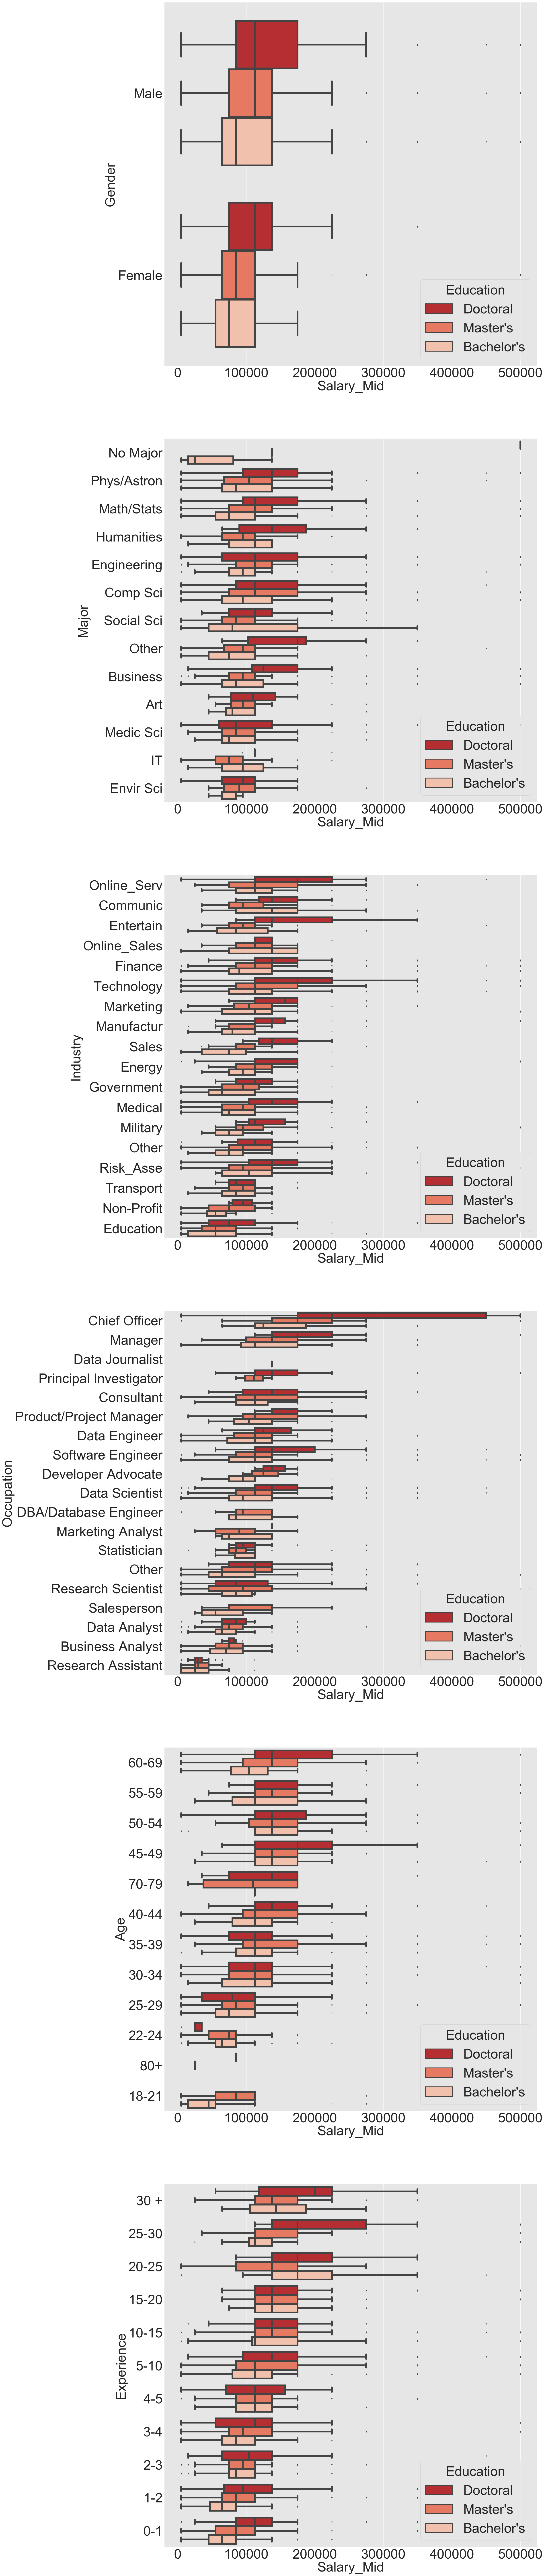

In [10]:
%matplotlib inline
mpl.rcParams['font.size'] = 60.0
cols = df.columns[[0,2,3,4,5,6]]
num_of_plots = len(cols)
fig, ax = plt.subplots(num_of_plots,1, figsize=(5*num_of_plots, 35*num_of_plots))

hue_df = (df[(df.Education=="Doctoral") | (df.Education=="Master's") | (df.Education=="Bachelor's")])
hue = hue_df.Education
hue_order = ["Doctoral","Master's","Bachelor's"]
palette = "Reds_r"

counter_1 = 0
for x in cols:
    sns.boxplot(y=hue_df[x], x=hue_df.Salary_Mid, hue=hue, hue_order=hue_order, ax = ax[counter_1], linewidth = 8, order = (
        sorted_by_median(hue_df, by=[x], column="Salary_Mid")), palette=palette)
    #ax[counter_1].legend(loc="bottom right")
    counter_1 += 1 
    
fig.show()

# Box Plots (all columns vs Salary_Mid, hue = Experience_Reduction)

# Observations
## Whereas Women's salary tends to stagnant despite increasing experience, 
## Men's salary increases in relation to their number of years of experience.

## Data Analyst's median salary stagnates after 5-10 years of experience

In [11]:
#Experience Reduction for simplicity
dictionary = {'0-1'    : "0-3",
              '1-2'    : "0-3",
              '2-3'    : "0-3",
              '3-4'    : "3-6",
              '4-5'    : "3-5",
              '5-10'   : "5-10",
              '10-15'  : "10-15",
              '15-20'  : "15+",
              '20-25'  : "15+",
              '25-30'  : "15+",
              '30 +'   : "15+"
            }
df['Experience_Reduction'] = df['Experience'].apply(lambda x: dictionary[x])

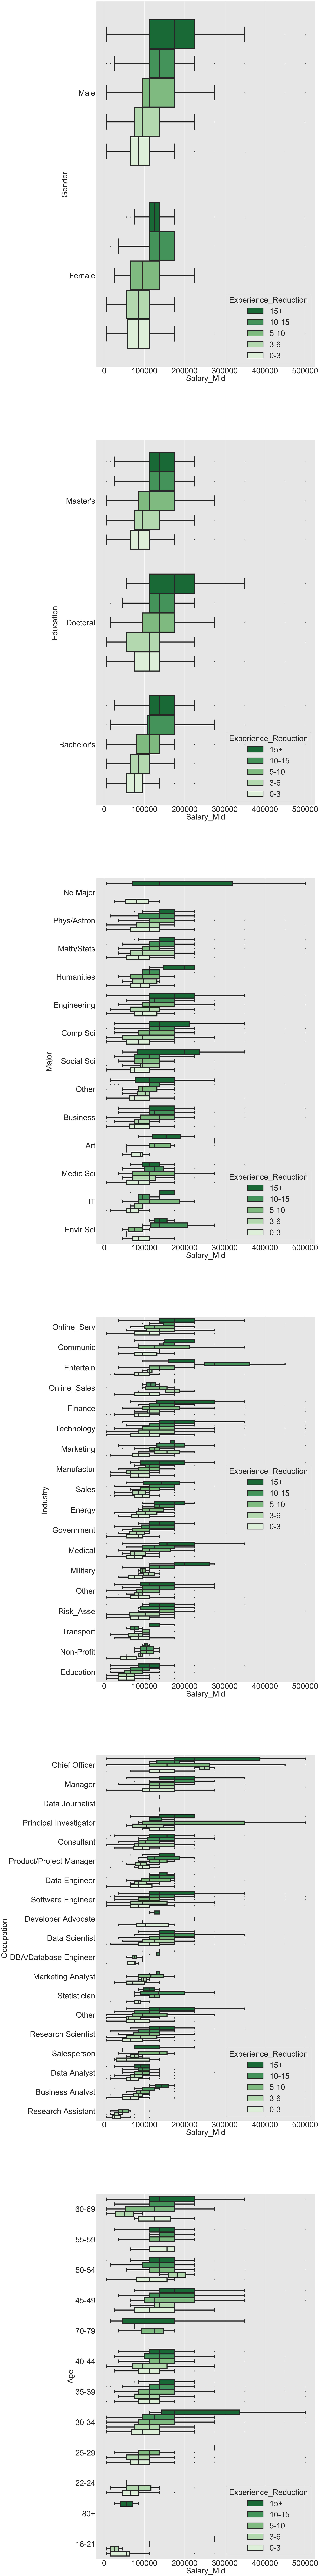

In [12]:
%matplotlib inline
mpl.rcParams['font.size'] = 60.0

cols = df.columns[[0,1,2,3,4,5]]
num_of_plots = len(cols)
fig, ax = plt.subplots(num_of_plots,1, figsize=(5*num_of_plots, 60*num_of_plots))

hue = df.Experience_Reduction
hue_order = ["15+","10-15","5-10","3-6","0-3"]
palette = "Greens_r"

counter_1 = 0
for x in cols:
    sns.boxplot(y=df[x], x=df.Salary_Mid, hue=hue, hue_order=hue_order, ax = ax[counter_1], linewidth = 8, order = (
        sorted_by_median(hue_df, by=[x], column="Salary_Mid")),palette=palette)
    counter_1 += 1
    
fig.show()

# Box Plots (all columns vs Salary_Mid, hue = Occupation_Top_3)

# Observation
## If Data Analyst is the preferred role, a Master's or PhD are not good investments

# Questions
## Why do Art majors have such high salaries in Software Engineering?

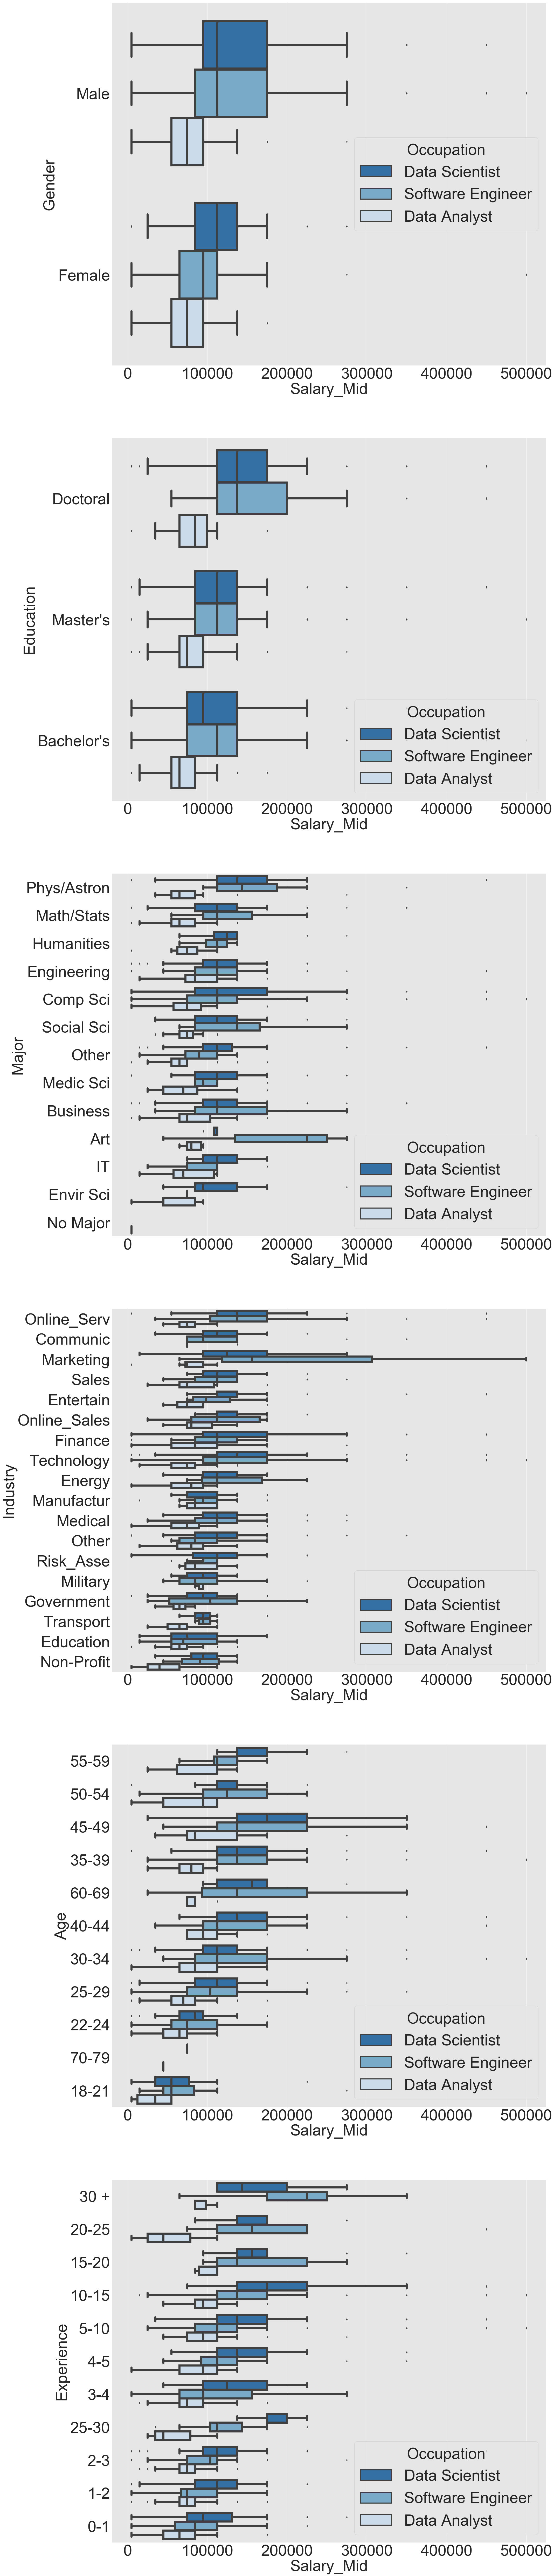

In [13]:
%matplotlib inline
mpl.rcParams['font.size'] = 60.0
cols = df.columns[[0,1,2,3,5,6]]
num_of_plots = len(cols)
fig, ax = plt.subplots(num_of_plots,1, figsize=(5*num_of_plots, 30*num_of_plots))

hue_df = (df[(df.Occupation=="Data Scientist") | (df.Occupation=="Software Engineer") | (df.Occupation=="Data Analyst")])
hue = hue_df.Occupation
hue_order = ["Data Scientist", "Software Engineer", "Data Analyst"]
palette = "Blues_r"

counter_1 = 0
for x in cols:
    sns.boxplot(y=hue_df[x], x=hue_df.Salary_Mid, hue=hue, hue_order=hue_order, ax = ax[counter_1], linewidth = 8, order = (
        sorted_by_median(hue_df, by=[x], column="Salary_Mid")), palette=palette)
    #ax[counter_1].legend(loc="bottom right")
    counter_1 += 1 
    
fig.show()

# Observation:
## The large number of PhDs in Online Services's, Art, and Physics contributes to the unusually high compensation in those subgroups

In [88]:
from IPython import display
from ipywidgets import interact, widgets

filter_column = "Major"

widget_df = df

def widget(filter_):
    widget_df = (df[df[filter_column]==filter_])
    #widget_df = (widget_df[(widget_df.Education=="Master's") | (widget_df.Education=="Bachelor's")])
    #widget_df = (widget_df[(widget_df.Gender=="Male") | (widget_df.Gender=="Female")])
    #widget_df = (widget_df[(widget_df.Age_Mid < 40) & (widget_df.Experience_Mid < 1)])
    
    %matplotlib inline
    mpl.rcParams['font.size'] = 20.0
    plt.figure(figsize=(12, 10))
    
    hue = widget_df.Gender
    palette = ['green','gold']
    
    sns.scatterplot(x=widget_df.Experience_Mid, y=widget_df.Salary_Mid, 
                    hue=hue, style=widget_df.Education, edgecolor = "black", 
                    size=(widget_df.Education), sizes=(40,200),
                    linewidth = 0, palette=palette, legend="brief")
    
    plt.axis(ymin=0,ymax=600000,xmin=0,xmax=35)

interact(widget,filter_=widgets.Dropdown(
    options=list(sorted(widget_df[filter_column].unique())),
    value=widget_df[filter_column].unique()[0],
    description='Filter:'))

interactive(children=(Dropdown(description='Filter:', index=3, options=('Art', 'Business', 'Comp Sci', 'Engine…

<function __main__.widget(filter_)>

# Observation:
## When examinig only the Data Scientist role, the salary overall follows common expectations (PhD > Masters > Bachelors etc.)

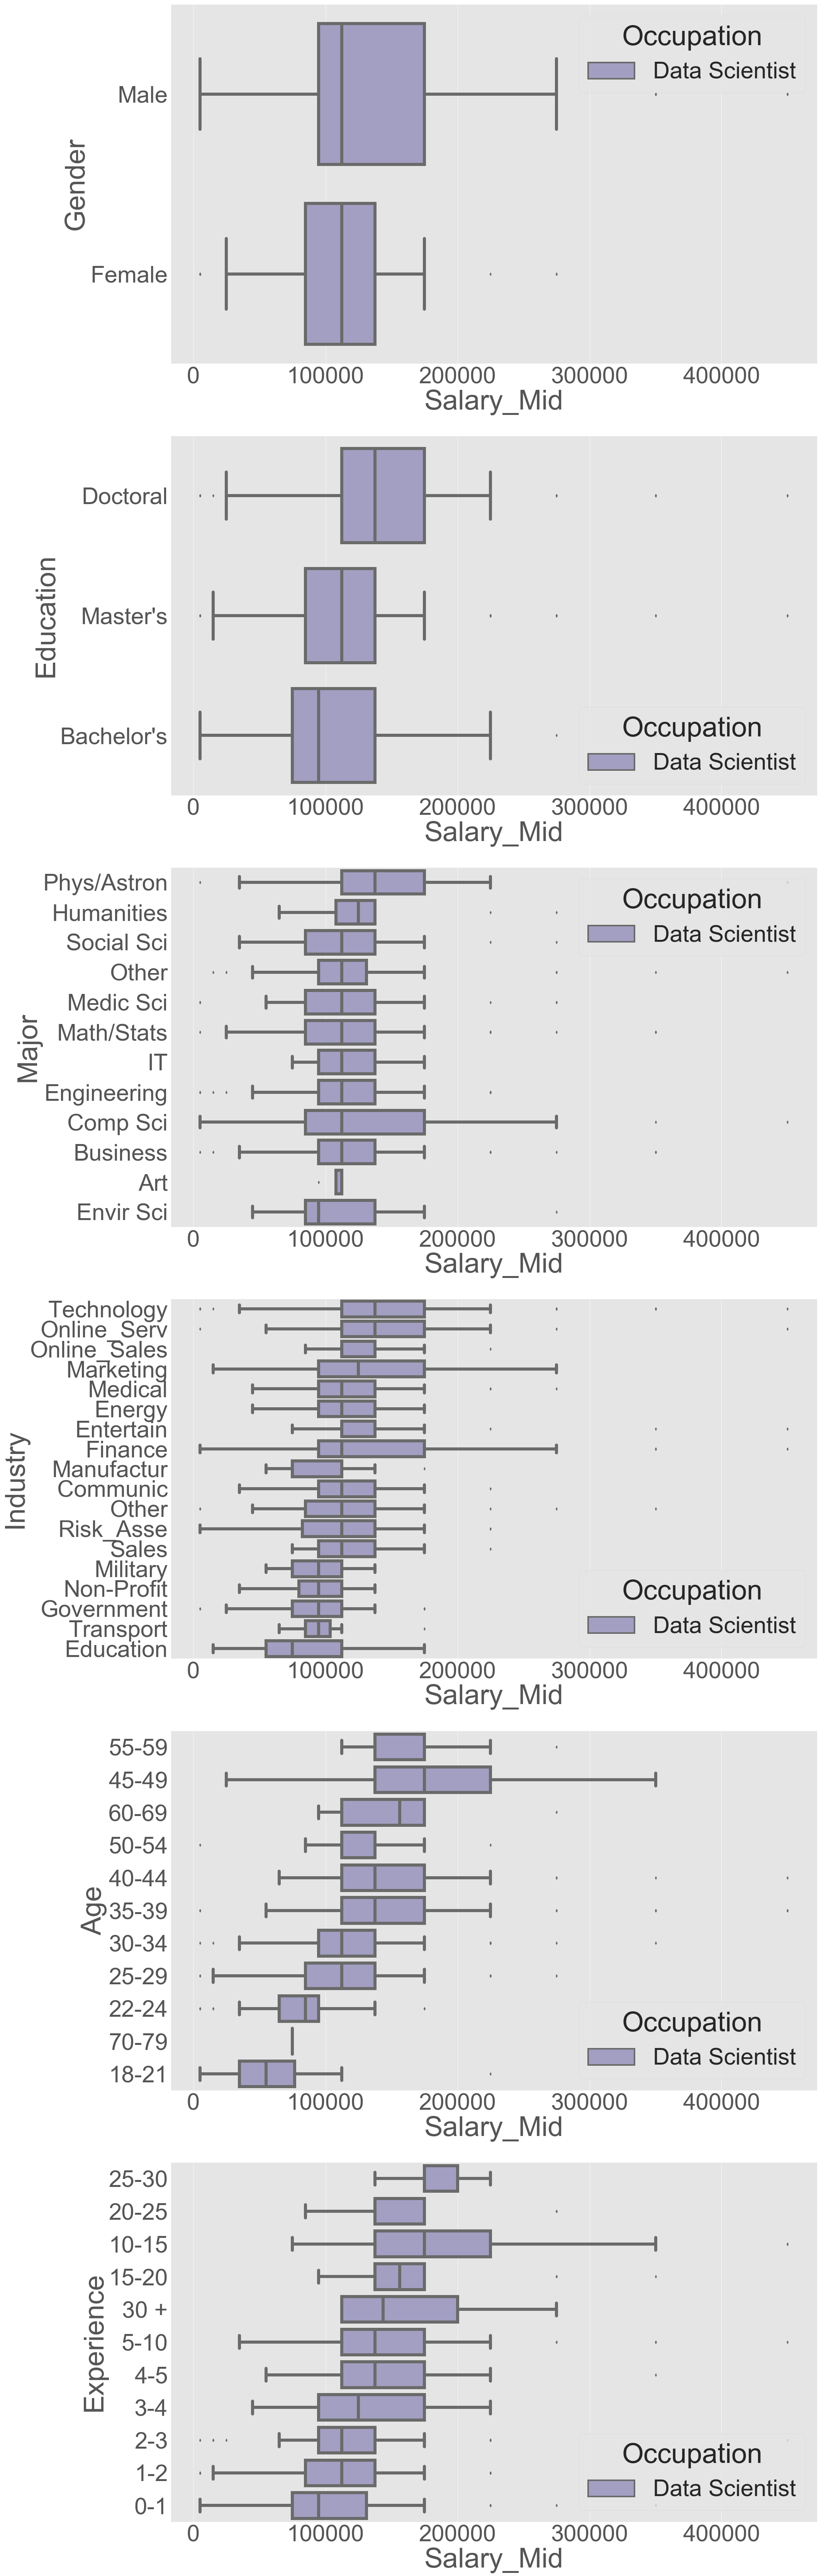

In [84]:
%matplotlib inline
mpl.rcParams['font.size'] = 60.0
cols = df.columns[[0,1,2,3,5,6]]
num_of_plots = len(cols)
fig, ax = plt.subplots(num_of_plots,1, figsize=(5*num_of_plots, 20*num_of_plots))

hue_df = df[df.Occupation=="Data Scientist"]
hue = hue_df.Occupation
palette = "Purples"

counter_1 = 0
for x in cols:
    sns.boxplot(y=hue_df[x], x=hue_df.Salary_Mid, hue=hue, ax = ax[counter_1], linewidth = 8, order = (
        sorted_by_median(hue_df, by=[x], column="Salary_Mid")), palette=palette)
    counter_1 += 1 
    
fig.show()

# LinkedIn Insights (DS Total Compensation Median: USD 114,000*)
## (* as of 2019/08/01)

# is comparable to this data (DS median salary: UDS 112,500**)
## (** survey from 2018/10/22 to 2018/10/29)
 
### LinkedIn has 7,419 DS
### This dataset has 751 DS

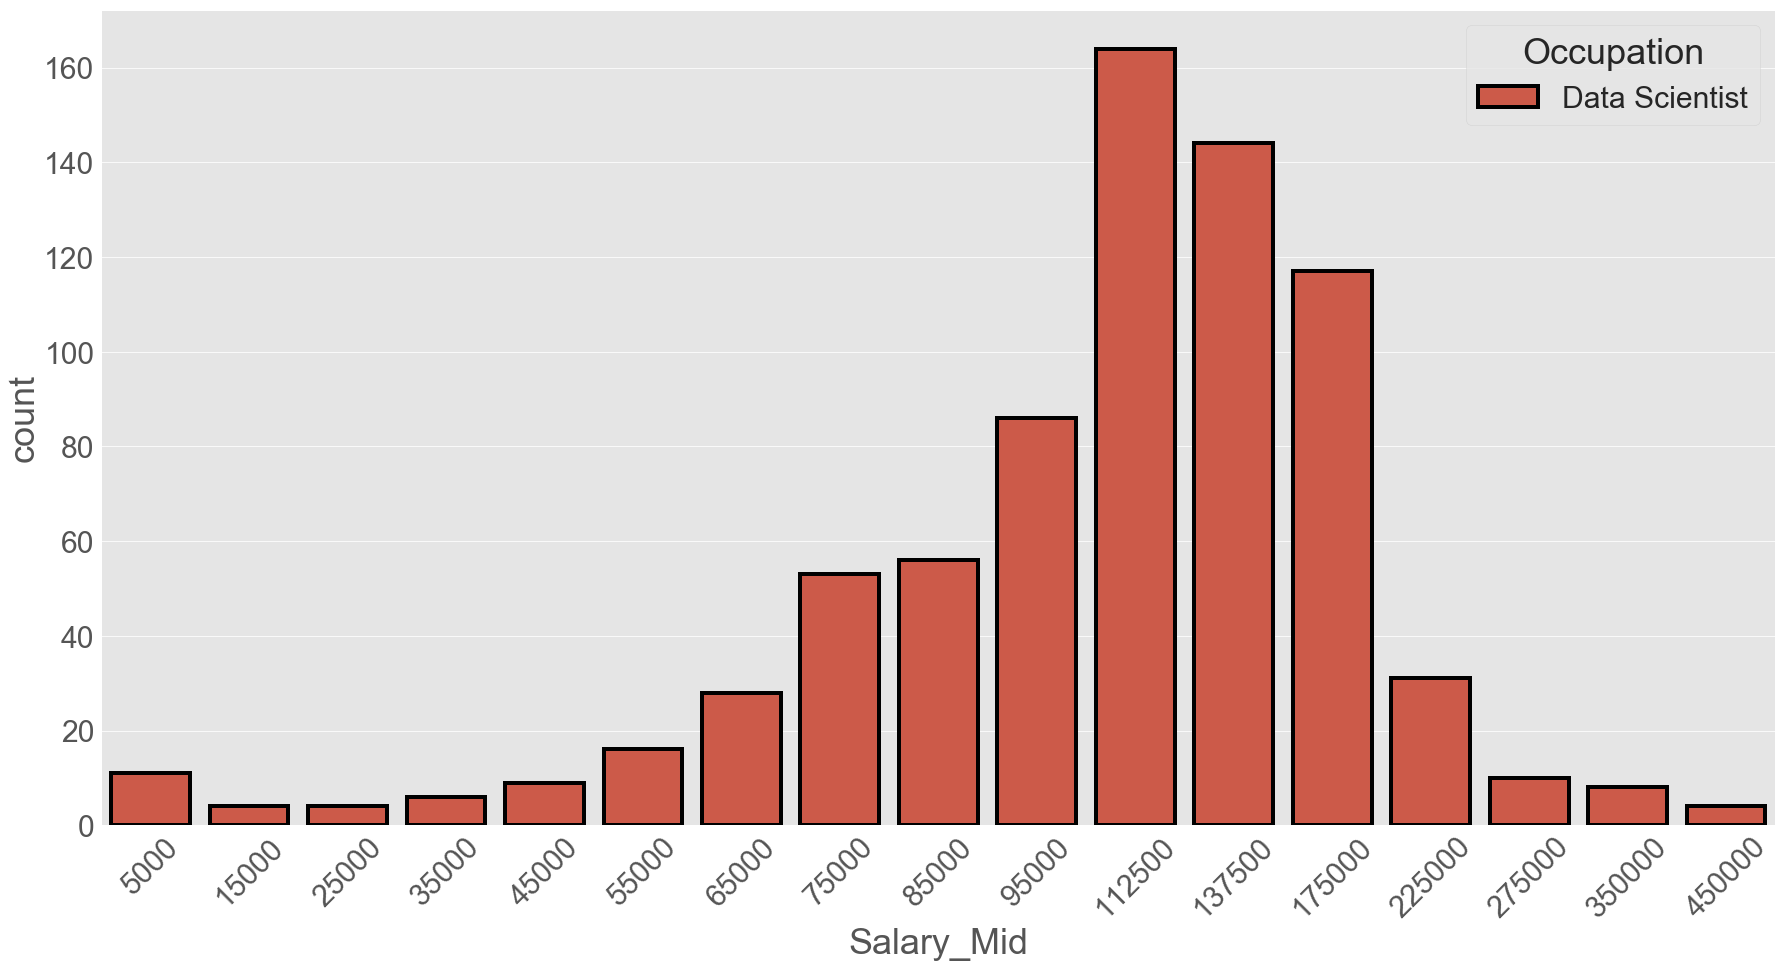

In [79]:
DS_df = df[df.Occupation=="Data Scientist"]
#DS_df = DS_df[((DS_df.Salary_Mid > 70000) & (DS_df.Salary_Mid < 150000))]

plt.figure(figsize=(30, 15))
mpl.rcParams['font.size'] = 30.0
plt.xticks(rotation=45)

sns.countplot(x = DS_df.Salary_Mid, edgecolor = "black", linewidth = 4,
              hue= DS_df.Occupation
             )

In [82]:
DS_df.Occupation.count(), DS_df.Salary_Mid.median()

(751, 112500.0)

# Examining DS ( < 1 year of experience )

## LinkedIn Insights (DS Total Compensation Median: USD 99,400*)
### (* as of 2019/08/01)

## is comparable to this data (DS median salary: UDS 95,000**)
### (** survey from 2018/10/22 to 2018/10/29)
 
### LinkedIn has 2,958 DS
### This dataset has 190 DS

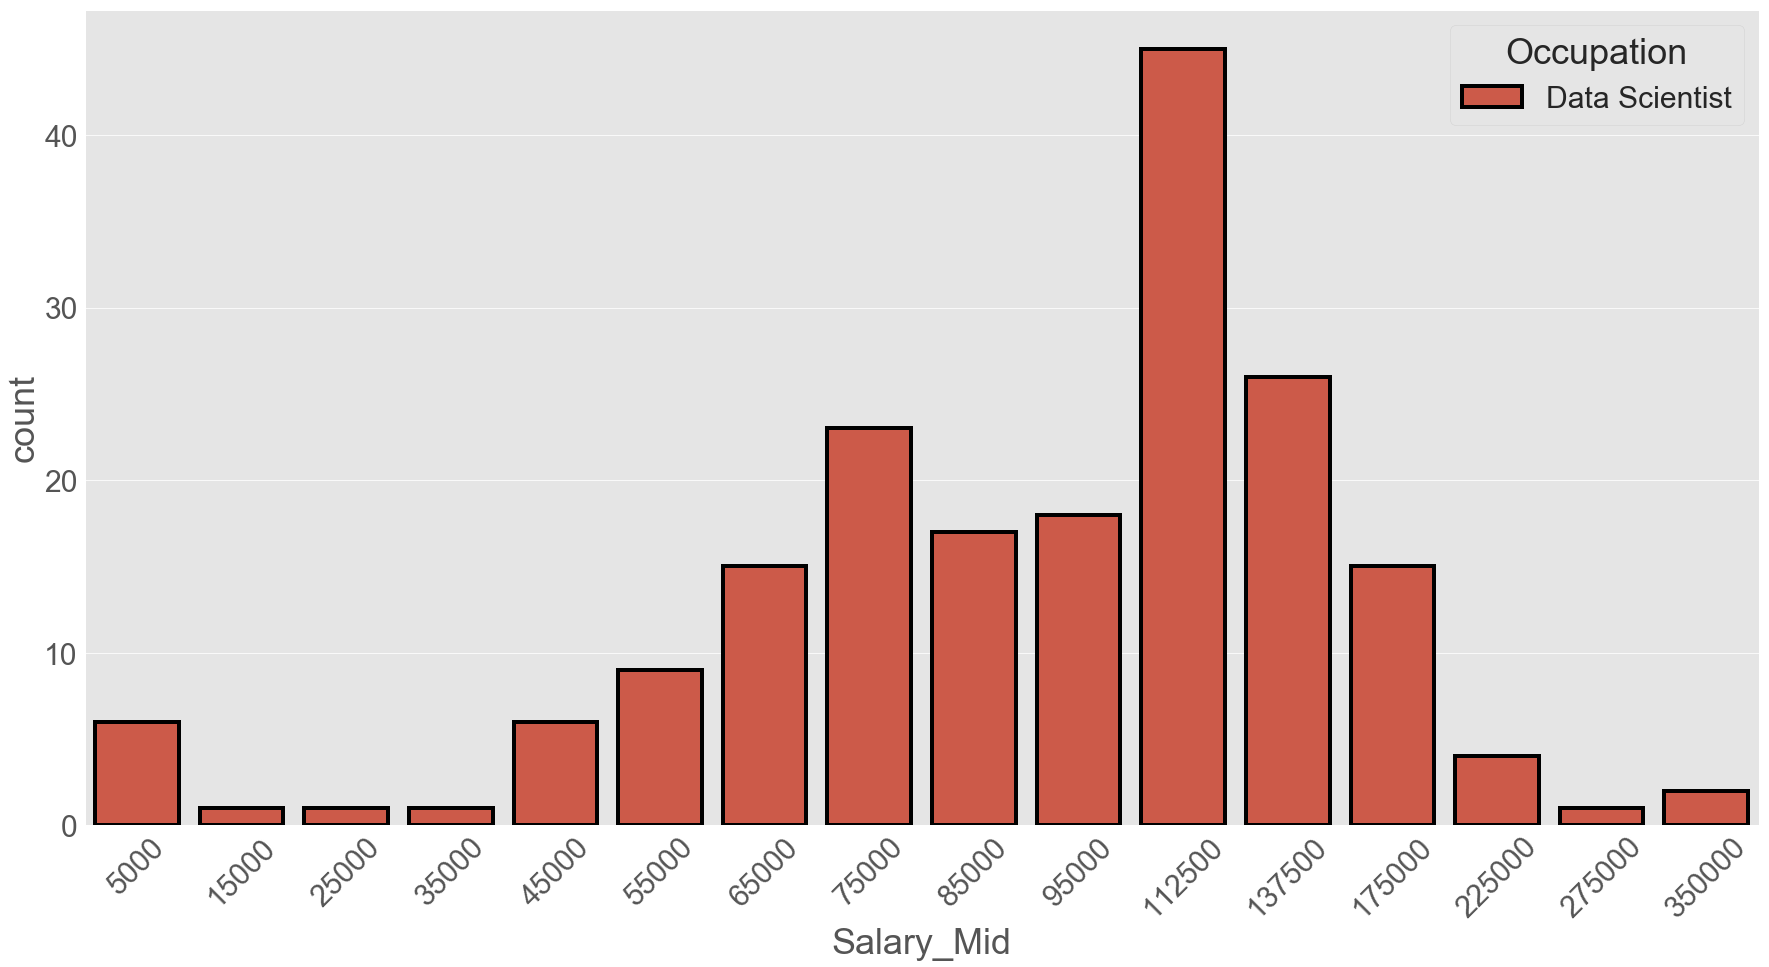

In [86]:
DS_df = df[df.Occupation == "Data Scientist"]
DS_df = DS_df[DS_df.Experience == "0-1"]

plt.figure(figsize=(30, 15))
mpl.rcParams['font.size'] = 30.0
plt.xticks(rotation=45)

sns.countplot(x = DS_df.Salary_Mid, edgecolor = "black", linewidth = 4,
              hue= DS_df.Occupation
             )

In [87]:
DS_df.Occupation.count(), DS_df.Salary_Mid.median()

(190, 95000.0)